<a href="https://colab.research.google.com/github/nitrogenlab/GP15_watermassanalysis/blob/main/dev_config_files_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y pyompa
%cd /content/
!rm -rf pyompa
!git clone https://github.com/nitrogenlab/pyompa
%cd /content/pyompa
!git checkout dev
!git log -1
!pip install .
%cd /content/

%reload_ext autoreload
%autoreload 2
from importlib import reload
import pyompa
reload(pyompa)

/content
Cloning into 'pyompa'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 582 (delta 174), reused 170 (delta 88), pack-reused 320
Receiving objects: 100% (582/582), 98.13 KiB | 292.00 KiB/s, done.
Resolving deltas: 100% (398/398), done.
/content/pyompa
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
commit bc577e3193bab6e5e8ff6a297056a916cb1677ec (HEAD -> dev, origin/dev)
Author: Avanti Shrikumar <avanti.shrikumar@gmail.com>
Date:   Tue Jan 19 19:03:38 2021 -0800

    bugfix
Processing /content/pyompa
  Created wheel for pyompa: filename=pyompa-0.3.0.3-cp36-none-any.whl size=18177 sha256=22e8d6832feeb51f012d8a4d3976805e91ceb966a28bc2471057ba98552fddfe
  Stored in directory: /tmp/pip-ephem-wheel-cache-h8q0_jcw/wheels/c8/e7/18/86bb9113ba57075c1244f892ac172edfebb6b9de263279873f
Successfully built pyompa
/content


<module 'pyompa' from '/usr/local/lib/python3.6/dist-packages/pyompa/__init__.py'>

In [2]:
!wget https://github.com/nitrogenlab/GP15_watermassanalysis/raw/main/endmember_df_intermediateanddeep.csv
!wget https://github.com/nitrogenlab/GP15_watermassanalysis/raw/main/gp15_intermediateanddeep_obs.csv
!wget https://github.com/nitrogenlab/GP15_watermassanalysis/raw/main/config_examples/config_example1.txt -O config_file.txt

--2021-01-20 03:12:58--  https://github.com/nitrogenlab/GP15_watermassanalysis/raw/main/endmember_df_intermediateanddeep.csv
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/endmember_df_intermediateanddeep.csv [following]
--2021-01-20 03:12:58--  https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/endmember_df_intermediateanddeep.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 772 [text/plain]
Saving to: ‘endmember_df_intermediateanddeep.csv’

endmember_df_interm 100%[===================>]     772  --.-KB/s    in 0s      

2021-01-20 0

In [3]:
from pyompa.parse_config import run_ompa_given_toml_config_file

ompa_soln = run_ompa_given_toml_config_file("config_file.txt")

Received Config:
{
    "observations": {
        "csv_file": "gp15_intermediateanddeep_obs.csv",
        "na_values": -999
    },
    "endmembers": {
        "csv_file": "endmember_df_intermediateanddeep.csv",
        "endmember_name_column": "watermass_name"
    },
    "params": {
        "potential_temp": {
            "weight": 56.0,
            "remineralized": false
        },
        "practical_salinity": {
            "weight": 80.0,
            "remineralized": false
        },
        "silicate": {
            "weight": 3.0,
            "remineralized": false
        },
        "nitrate": {
            "weight": 5.0,
            "remineralized": true,
            "ratios": [
                0.10330578512,
                0.10330578512
            ]
        },
        "phosphate": {
            "weight": 5.0,
            "remineralized": true,
            "ratios": [
                0.01036168132,
                0.00327210989
            ]
        },
        "oxygen": {
      

Plotting endmember usage penalties


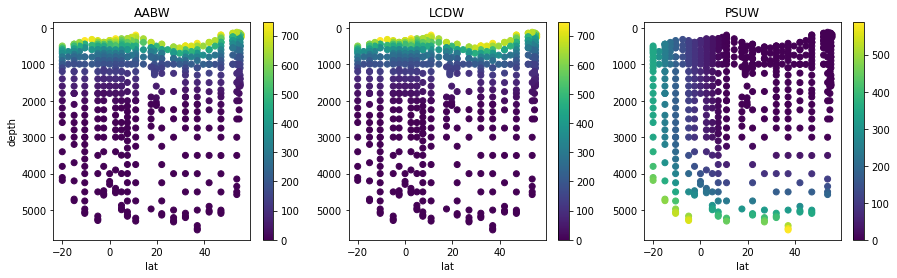

Plotting endmember fractions


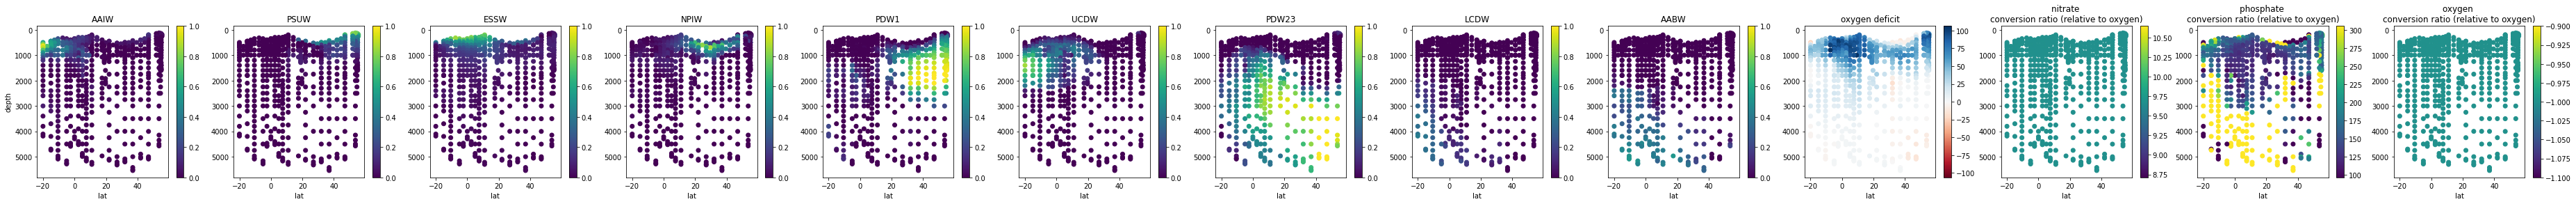

Plotting residuals


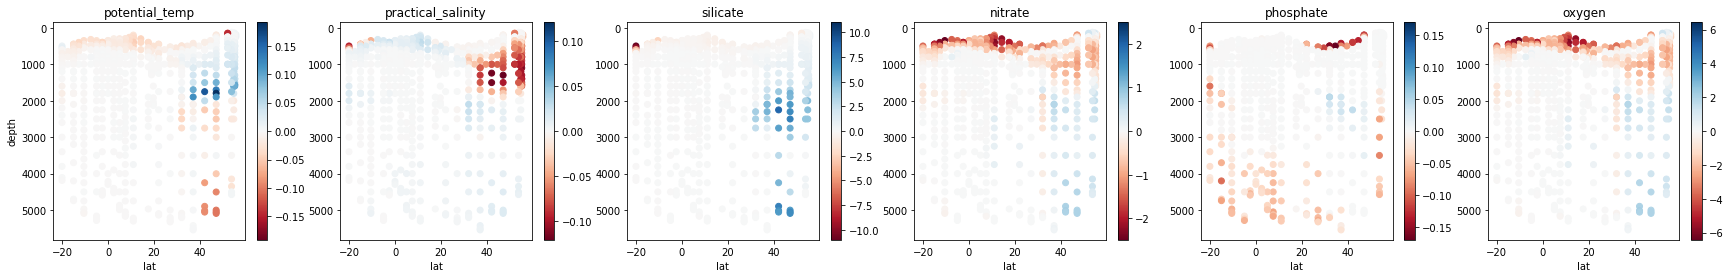

In [4]:
from pyompa import (plot_ompasoln_endmember_fractions,
                    plot_ompasoln_residuals,
                    plot_ompasoln_endmember_usagepenalties)

XAXIS_COLNAME = "lat"
YAXIS_COLNAME = "depth"

if (len(ompa_soln.endmembername_to_usagepenalty) > 0):
    #plot usage penalties if applicable
    print("Plotting endmember usage penalties")
    plot_ompasoln_endmember_usagepenalties(
        ompa_soln, xaxis_colname=XAXIS_COLNAME,
        yaxis_colname=YAXIS_COLNAME)
print("Plotting endmember fractions")
plot_ompasoln_endmember_fractions(ompa_soln, xaxis_colname=XAXIS_COLNAME,
                                  yaxis_colname=YAXIS_COLNAME)
print("Plotting residuals")
plot_ompasoln_residuals(ompa_soln, xaxis_colname=XAXIS_COLNAME,
                        yaxis_colname=YAXIS_COLNAME)

In [5]:
from pyompa import build_altair_viz

build_altair_viz(ompa_soln, xaxis_colname="lat", yaxis_colname="depth" )

alt.VConcatChart(...)